In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv')

# Aggregate data by recipe -- EXAMPLE (adjust as needed)
agg_data = data.groupby('recipe_code').agg({
    'stars': 'mean',  # Average rating
    'comment_id': 'count',  # Count of comments as a proxy for engagement
    'best_score': 'mean'  # Average best score
}).reset_index()

# Rename columns to reflect their new meaning
agg_data.rename(columns={
    'stars': 'avg_stars', 
    'comment_id': 'comment_count', 
    'best_score': 'avg_best_score'
}, inplace=True)

# Create a new 'popularity' score, possibly weighted
agg_data['popularity'] = agg_data['avg_stars'] * 0.5 + agg_data['comment_count'] * 0.3 + agg_data['avg_best_score'] * 0.2

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(agg_data[['avg_stars', 'comment_count', 'avg_best_score']])
y = agg_data['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Deep Learning Model (Starter Code)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),  # ReLU activation function for hidden layer
        Dropout(0.2),  # Dropout for regularization
        Dense(64, activation='relu'),  # Another hidden layer
        Dropout(0.2),
        Dense(1, activation='linear')  # Linear activation for a regression output
    ])
    # Compile the model with an optimizer and loss function
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Instantiate and train the model
model = build_model(X_train.shape[1])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Step 8: Model Evaluation
y_pred = model.predict(X_test).flatten()
print("\nMean Absolute Error (MAE):")
print(mean_absolute_error(y_test, y_pred))


Epoch 1/50


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - loss: 8601.2832 - mean_absolute_error: 86.6569 - val_loss: 7548.4746 - val_mean_absolute_error: 85.6535
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8154.4263 - mean_absolute_error: 84.4687 - val_loss: 7530.2334 - val_mean_absolute_error: 85.5511
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8274.0254 - mean_absolute_error: 86.0085 - val_loss: 7512.0986 - val_mean_absolute_error: 85.4492
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8416.6895 - mean_absolute_error: 86.0660 - val_loss: 7493.5322 - val_mean_absolute_error: 85.3448
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8045.3613 - mean_absolute_error: 84.6978 - val_loss: 7474.0850 - val_mean_absolute_error: 85.2350
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8254.8369 - mean_absolute_error: 85.4188 - val_loss: 7453.6929 - val_mean_absolute_error: 85.1196
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7819.0635 - mean_absolute

# RNN

Epoch 1/50


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 8528.9033 - mean_absolute_error: 87.2255 - val_loss: 7578.5889 - val_mean_absolute_error: 85.8243
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8438.8135 - mean_absolute_error: 86.8019 - val_loss: 7569.6631 - val_mean_absolute_error: 85.7732
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8701.3418 - mean_absolute_error: 87.6862 - val_loss: 7560.2725 - val_mean_absolute_error: 85.7196
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8318.7285 - mean_absolute_error: 85.9332 - val_loss: 7550.6113 - val_mean_absolute_error: 85.6643
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8196.6094 - mean_absolute_error: 85.6003 - val_loss: 7540.5127 - val_mean_absolute_error: 85.6064
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8296.3047 - mean_absolute_error: 85.8282 - val_loss: 7529.9268 - val_mean_absolute_error: 85.5456
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8759.4521 - mean_absolute_

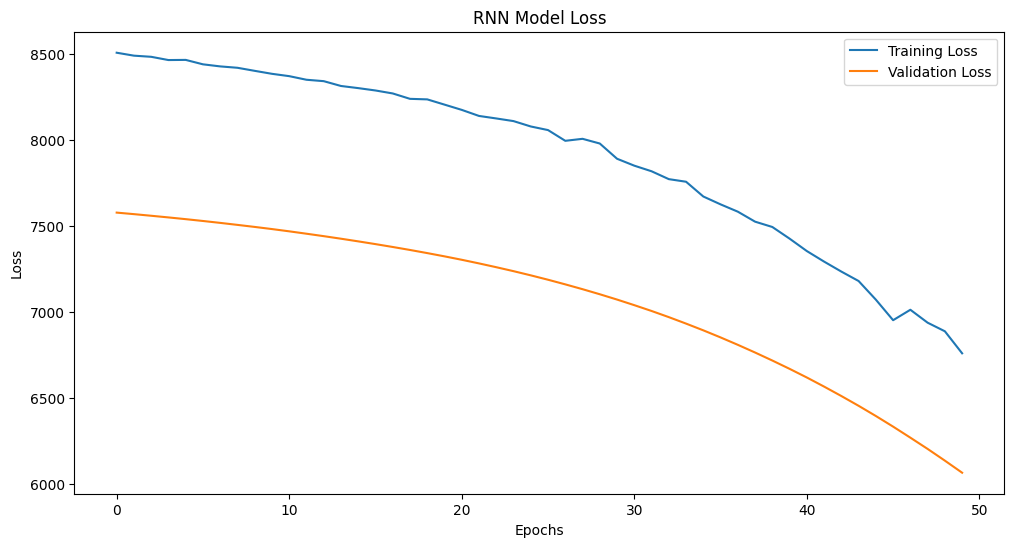

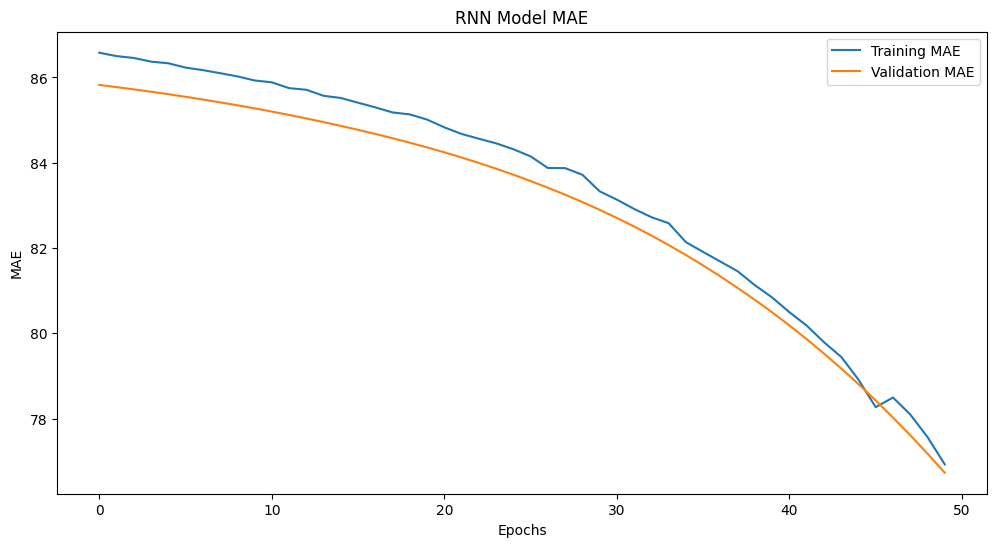

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Data
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv')

# Aggregate data by recipe
agg_data = data.groupby('recipe_code').agg({
    'stars': 'mean',  # Average rating
    'comment_id': 'count',  # Count of comments as a proxy for engagement
    'best_score': 'mean'  # Average best score
}).reset_index()

# Rename columns
agg_data.rename(columns={
    'stars': 'avg_stars', 
    'comment_id': 'comment_count', 
    'best_score': 'avg_best_score'
}, inplace=True)

# Create a new 'popularity' score
agg_data['popularity'] = agg_data['avg_stars'] * 0.5 + agg_data['comment_count'] * 0.3 + agg_data['avg_best_score'] * 0.2

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(agg_data[['avg_stars', 'comment_count', 'avg_best_score']])
y = agg_data['popularity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for RNN (RNN expects 3D input: samples, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 2: Build the RNN Model
def build_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(64, activation='relu', input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        SimpleRNN(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')  # Linear activation for regression output
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Step 3: Instantiate and Train the Model
rnn_model = build_rnn_model((X_train_rnn.shape[1], X_train_rnn.shape[2]))
history_rnn = rnn_model.fit(
    X_train_rnn, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Step 4: Evaluate the Model
# Make predictions
y_pred_rnn = rnn_model.predict(X_test_rnn).flatten()

# Calculate MAE
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
print(f"\nMean Absolute Error (MAE): {mae_rnn:.4f}")

# Step 5: Visualize Training Loss and MAE
plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['mean_absolute_error'], label='Training MAE')
plt.plot(history_rnn.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('RNN Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

MAE in this context helps assess how well the model predicts recipe popularity. It provides a straightforward indication of how far, on average, the predicted scores deviate from the actual scores in the test set. A lower MAE reflects better predictive accuracy of the model.

# LSTM

Epoch 1/50


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 8289.6533 - mean_absolute_error: 85.7729 - val_loss: 7563.9272 - val_mean_absolute_error: 85.7323
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8520.4434 - mean_absolute_error: 86.2487 - val_loss: 7560.2334 - val_mean_absolute_error: 85.7113
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8080.3867 - mean_absolute_error: 84.7152 - val_loss: 7556.3530 - val_mean_absolute_error: 85.6891
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8193.6465 - mean_absolute_error: 85.4700 - val_loss: 7552.1855 - val_mean_absolute_error: 85.6653
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8287.7734 - mean_absolute_error: 85.7600 - val_loss: 7547.6006 - val_mean_absolute_error: 85.6392
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8705.0439 - mean_absolute_error: 86.8957 - val_loss: 7542.5820 - val_mean_absolute_error: 85.6106
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7972.3115 - mean_absolu

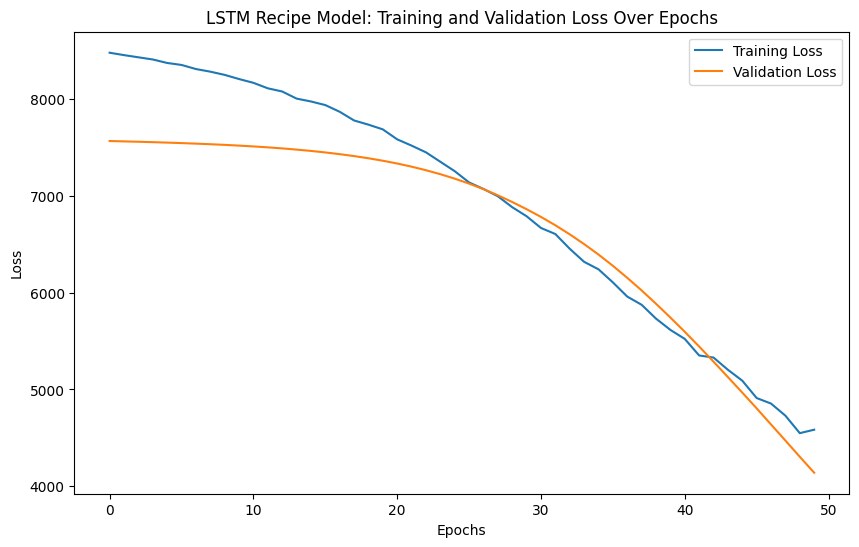


Sample Predictions:
       Actual  Predicted
0   73.561654  12.758169
1   90.628049  27.017410
2   94.082022  26.000353
3   64.192969   8.322321
4   83.901075  24.921133
5   79.584722  19.793032
6  106.639033  24.232571
7   70.734615  14.314262
8  247.060828  33.608898
9  102.887946  24.608732


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# Step 1: Load the dataset
lstm_recipe_data = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv')

# Step 2: Aggregate data by recipe
lstm_recipe_agg_data = lstm_recipe_data.groupby('recipe_code').agg({
    'stars': 'mean',  # Average rating
    'comment_id': 'count',  # Count of comments as a proxy for engagement
    'best_score': 'mean'  # Average best score
}).reset_index()

# Rename columns
lstm_recipe_agg_data.rename(columns={
    'stars': 'avg_stars', 
    'comment_id': 'comment_count', 
    'best_score': 'avg_best_score'
}, inplace=True)

# Create a 'popularity' score
lstm_recipe_agg_data['popularity'] = lstm_recipe_agg_data['avg_stars'] * 0.5 + lstm_recipe_agg_data['comment_count'] * 0.3 + lstm_recipe_agg_data['avg_best_score'] * 0.2

# Step 3: Normalize the features
lstm_recipe_scaler = StandardScaler()
lstm_recipe_X = lstm_recipe_scaler.fit_transform(lstm_recipe_agg_data[['avg_stars', 'comment_count', 'avg_best_score']])
lstm_recipe_y = lstm_recipe_agg_data['popularity']

# Step 4: Reshape for LSTM and split data
lstm_recipe_X_reshaped = np.expand_dims(lstm_recipe_X, axis=1)  # Reshape for LSTM (samples, timesteps, features)
lstm_recipe_X_train, lstm_recipe_X_test, lstm_recipe_y_train, lstm_recipe_y_test = train_test_split(
    lstm_recipe_X_reshaped, lstm_recipe_y, test_size=0.2, random_state=42
)

# Step 5: Build the LSTM model
def build_lstm_recipe_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape, activation='tanh'),
        Dropout(0.2),
        BatchNormalization(),
        LSTM(64, return_sequences=False, activation='tanh'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')  # Linear output for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Instantiate the model
lstm_recipe_input_shape = (lstm_recipe_X_train.shape[1], lstm_recipe_X_train.shape[2])
lstm_recipe_model = build_lstm_recipe_model(lstm_recipe_input_shape)

# Step 6: Train the model
lstm_recipe_history = lstm_recipe_model.fit(
    lstm_recipe_X_train, lstm_recipe_y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Step 7: Evaluate the model
lstm_recipe_y_pred = lstm_recipe_model.predict(lstm_recipe_X_test).flatten()
lstm_recipe_mae = mean_absolute_error(lstm_recipe_y_test, lstm_recipe_y_pred)
print(f"\nMean Absolute Error (MAE): {lstm_recipe_mae:.4f}")

# Step 8: Visualize Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(lstm_recipe_history.history['loss'], label='Training Loss')
plt.plot(lstm_recipe_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Recipe Model: Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 9: Save Results
lstm_recipe_results = pd.DataFrame({
    'Actual': lstm_recipe_y_test,
    'Predicted': lstm_recipe_y_pred
}).reset_index(drop=True)
print("\nSample Predictions:")
print(lstm_recipe_results.head(10))

1. Training and Validation Loss Plot:

Observation:
	•	The plot shows the Training Loss (blue line) and Validation Loss (orange line) over 50 epochs.
	•	Both losses are decreasing steadily, indicating that the model is learning effectively during training.
	•	Around the later epochs (45–50), the lines are close together, which suggests the model is not significantly overfitting.

Key Insights:
	•	Smooth Decrease: A smooth decrease in both curves indicates stable training without major issues like vanishing gradients or poor learning rates.
	•	Convergence: The validation loss is close to the training loss at the end of training, suggesting that the model is generalizing well to unseen data.
	•	Stopping Point: If further training is done, early stopping could be used when the validation loss plateaus or increases to avoid overfitting.

Despite lower MAE score, it could have peaked around 30-40 epochs as it shows the two diverging at 50. This is in contrast to the CNN below.

# CNN

Epoch 1/50


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 8550.9580 - mean_absolute_error: 86.5972 - val_loss: 7568.6743 - val_mean_absolute_error: 85.7564
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8936.2354 - mean_absolute_error: 87.8659 - val_loss: 7563.4395 - val_mean_absolute_error: 85.7262
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8512.2959 - mean_absolute_error: 86.1025 - val_loss: 7557.8105 - val_mean_absolute_error: 85.6940
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8369.7461 - mean_absolute_error: 86.4119 - val_loss: 7551.4282 - val_mean_absolute_error: 85.6575
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8626.6045 - mean_absolute_error: 87.2704 - val_loss: 7544.6670 - val_mean_absolute_error: 85.6186
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8271.3799 - mean_absolute_error: 85.7020 - val_loss: 7536.9697 - val_mean_absolute_error: 85.5742
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8226.5938 - mean_absolute_

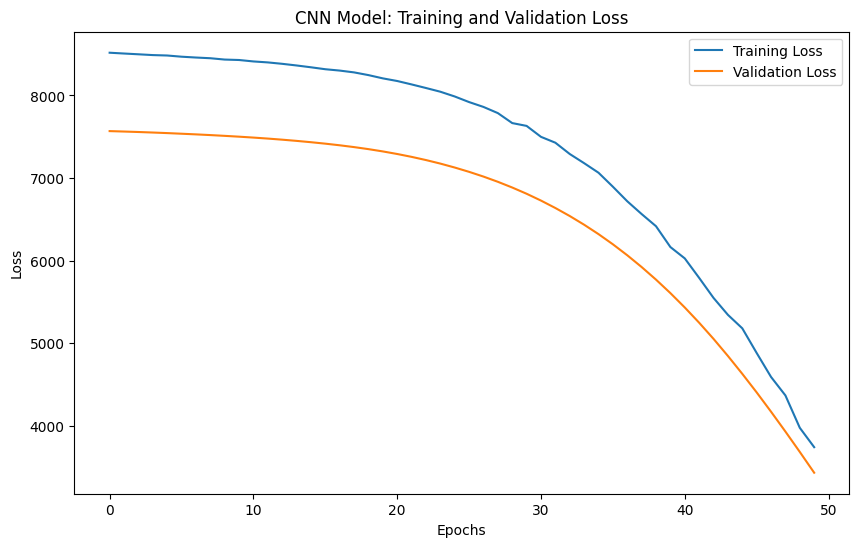


Sample Predictions:
       Actual  Predicted
0   73.561654  27.769438
1   90.628049  29.375082
2   94.082022  26.776817
3   64.192969  30.726559
4   83.901075  26.233999
5   79.584722  25.562052
6  106.639033  29.741423
7   70.734615  26.319960
8  247.060828  93.840248
9  102.887946  21.990519


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv')

# Aggregate data by recipe
cnn_data = data.groupby('recipe_code').agg({
    'stars': 'mean',  # Average rating
    'comment_id': 'count',  # Count of comments as a proxy for engagement
    'best_score': 'mean'  # Average best score
}).reset_index()

# Rename columns
cnn_data.rename(columns={
    'stars': 'cnn_avg_stars', 
    'comment_id': 'cnn_comment_count', 
    'best_score': 'cnn_avg_best_score'
}, inplace=True)

# Create a 'popularity' score
cnn_data['cnn_popularity'] = cnn_data['cnn_avg_stars'] * 0.5 + cnn_data['cnn_comment_count'] * 0.3 + cnn_data['cnn_avg_best_score'] * 0.2

# Normalize features
cnn_scaler = StandardScaler()
cnn_X_scaled = cnn_scaler.fit_transform(cnn_data[['cnn_avg_stars', 'cnn_comment_count', 'cnn_avg_best_score']])
cnn_y = cnn_data['cnn_popularity']

# Reshape X for CNN input
cnn_X_scaled_reshaped = cnn_X_scaled.reshape(cnn_X_scaled.shape[0], cnn_X_scaled.shape[1], 1)  # Add a feature dimension

# Split the data into training and testing sets
cnn_X_train, cnn_X_test, cnn_y_train, cnn_y_test = train_test_split(cnn_X_scaled_reshaped, cnn_y, test_size=0.2, random_state=42)

# Build the CNN Model
def build_cnn_model(cnn_input_shape):
    cnn_model = Sequential([
        Conv1D(64, kernel_size=2, activation='relu', input_shape=cnn_input_shape),
        Dropout(0.2),
        Conv1D(32, kernel_size=2, activation='relu'),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')  # Linear activation for regression output
    ])
    cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return cnn_model

# Build and train the model
cnn_input_shape = (cnn_X_train.shape[1], cnn_X_train.shape[2])
cnn_model = build_cnn_model(cnn_input_shape)

cnn_history = cnn_model.fit(
    cnn_X_train, cnn_y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
cnn_y_pred = cnn_model.predict(cnn_X_test).flatten()
cnn_mae = mean_absolute_error(cnn_y_test, cnn_y_pred)
print(f"Mean Absolute Error (MAE): {cnn_mae:.4f}")

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display predictions for sample test cases
cnn_sample_predictions = pd.DataFrame({
    'Actual': cnn_y_test[:10].values,
    'Predicted': cnn_y_pred[:10]
})
print("\nSample Predictions:")
print(cnn_sample_predictions)

Training Loss (blue line):
	•	This indicates how well your model is performing on the training dataset. The consistent decline in training loss over epochs shows that the model is learning the patterns in the training data effectively.
	•	Validation Loss (orange line):
	•	This reflects the model’s performance on the validation dataset (unseen data during training). The gradual decrease in validation loss indicates that the model generalizes well without overfitting.
	•	Convergence:
	•	Both the training and validation losses are decreasing and are close to each other at the final epoch. This suggests that the model is not overfitting and has learned meaningful patterns.

Mean Absolute Error (MAE):
	•	Value: 59.9452:
	•	This represents the average absolute difference between the predicted popularity scores and the actual scores on the test data. A lower MAE indicates better model performance. However, could want to compare this value to the scale of your popularity scores to understand its significance.